<a href="https://colab.research.google.com/github/Javsk891/proyecto-integrador-2/blob/main/LSTM_model_ipynb_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Redes Neuronales LSTM para el forecasting de PM2.5 en la ciudad de Medellín (Estación de monitoreo El Volador)

La calidad del aire es un factor crucial para la salud pública y el bienestar en las ciudades modernas. En particular, en la ciudad de Medellín, Colombia, donde la densidad poblacional y las actividades industriales pueden contribuir a la contaminación atmosférica, el monitoreo y la predicción de los niveles de contaminantes son esenciales para tomar medidas preventivas y mitigar los efectos adversos en la salud de la población.

En este contexto, las redes neuronales recurrentes (RNN) se han destacado como herramientas poderosas para modelar secuencias temporales, como los datos de calidad del aire. Específicamente, las redes neuronales de memoria a corto y largo plazo (LSTM) han demostrado ser efectivas en la predicción de series temporales debido a su capacidad para capturar dependencias a largo plazo en los datos.

En este código, se implementa una red neuronal LSTM para predecir los niveles de PM2.5, uno de los principales contaminantes atmosféricos, en la ciudad de Medellín. Utilizando datos históricos de calidad del aire, se entrena el modelo LSTM para aprender patrones temporales y realizar pronósticos precisos de los niveles futuros de PM2.5. Esta herramienta tiene el potencial de proporcionar información valiosa para los organismos gubernamentales y la población en general, permitiendo una mejor planificación y toma de decisiones en relación con la calidad del aire y la salud pública.

# Importando el dataset desde Googel Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
df1 = pd.read_csv('/content/drive/My Drive/volador_ventana.csv')

In [ ]:
df1.head()

,Unnamed: 0.1,Unnamed: 0,Fecha,Nombre de la estación,Latitud,Longitud,Nombre del municipio,CO,Dirección del Viento,Humedad Relativa,...,PST,Precipitación Líquida,Presión Atmosférica,Radiación Solar Global,SO2,Temperatura,Temperatura a 10 m,Temperatura a 2 m,Velocidad del Viento,Año
0,116204,116204,2012-09-18 00:00:00,MED-UN Núcleo Volador,6.266139,-75.580222,MEDELLÍN,NaN,0.0,NaN,...,NaN,0.5,642.265200,0.0,NaN,NaN,20.91058,NaN,0.0,2012
1,116220,116220,2012-09-18 01:00:00,MED-UN Núcleo Volador,6.266139,-75.580222,MEDELLÍN,NaN,0.0,NaN,...,NaN,0.0,641.204163,0.0,NaN,NaN,20.91058,NaN,0.0,2012
2,116236,116236,2012-09-18 02:00:00,MED-UN Núcleo Volador,6.266139,-75.580222,MEDELLÍN,NaN,0.0,NaN,...,NaN,0.0,641.870900,0.0,NaN,NaN,20.91058,NaN,0.0,2012
3,116252,116252,2012-09-18 03:00:00,MED-UN Núcleo Volador,6.266139,-75.580222,MEDELLÍN,NaN,0.0,NaN,...,NaN,0.1,641.633400,0.0,NaN,NaN,20.91058,NaN,0.0,2012
4,116268,116268,2012-09-18 04:00:00,MED-UN Núcleo Volador,6.266139,-75.580222,MEDELLÍN,NaN,0.0,NaN,...,NaN,0.0,641.612700,0.0,NaN,NaN,20.91058,NaN,0.0,2012


# Seleccionando la variable de interes

Se selecciona la varible PM2.5 que sobre la cual se quieren hacer predicciones y además se establece como indice las fechas de la serie de tiempo

In [ ]:
# Seleccionar las columnas 'Fecha' y 'PM2.5'
df = df1[['Fecha', 'PM2.5']]

# Mostrar las primeras filas del DataFrame resultante
df.head()

,Fecha,PM2.5
0,2012-09-18 00:00:00,15.915789
1,2012-09-18 01:00:00,15.922298
2,2012-09-18 02:00:00,15.928807
3,2012-09-18 03:00:00,15.935316
4,2012-09-18 04:00:00,15.941825


In [ ]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [ ]:
df['Fecha'] = pd.to_datetime(df['Fecha'])
df.set_index('Fecha', inplace=True)

<ipython-input-7-612bf5a72544>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fecha'] = pd.to_datetime(df['Fecha'])


# Selección de la línea de tiempo sobre la cual se realiza el entrenamiento, validación y test.

Se seleccióna el lapso de timepo comprendido entre '2013-01-01 00:00:00' y '2015-12-31 23:00:00', debido a que es la ventana de tiempo que presenta una integridad temporal y caracterirticas mas adecuadas para el entrenamiento de los diferenetes modelos que se han utilizado en el estuido realizado

In [ ]:
df = df.loc[(df.index >= '2013-01-01 00:00:00') & (df.index <= '2015-12-31 23:00:00')]
df.head()

,PM2.5
Fecha,
2013-01-01 00:00:00,34.0
2013-01-01 01:00:00,49.0
2013-01-01 02:00:00,69.0
2013-01-01 03:00:00,62.0
2013-01-01 04:00:00,55.0


# Visualización de la serie de tiempo

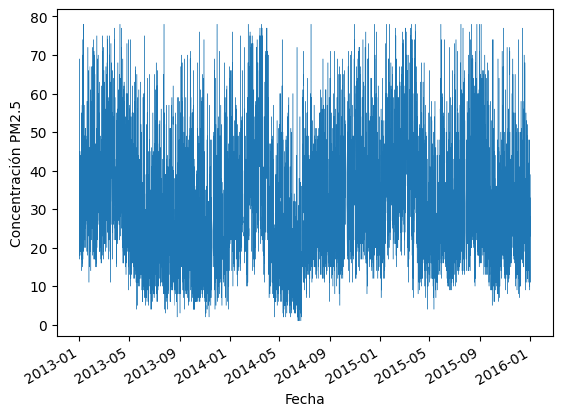

In [ ]:
import matplotlib.pyplot as plt

pm25 = df['PM2.5']
pm25.plot(linewidth=0.3)
plt.xlabel('Fecha')
plt.ylabel('Concentración PM2.5')
plt.show()

#Definición del Modelo LSTM

El proceso de desarrollo del modelo LSTM para predecir los niveles de PM2.5 en Medellín comenzó con la preparación de los datos. Se dividió el conjunto de datos históricos en tres conjuntos distintos: entrenamiento (train), validación (val) y prueba (test). El conjunto de entrenamiento se utilizó para ajustar los pesos del modelo, el conjunto de validación se utilizó para ajustar los hiperparámetros y evitar el sobreajuste, y el conjunto de prueba se reservó para evaluar el rendimiento final del modelo.

Para entrenar el modelo LSTM, se utilizó el conjunto de entrenamiento y se iteró a través de múltiples épocas. Durante el entrenamiento, se ajustaron los pesos de la red neuronal mediante el algoritmo de retropropagación y se optimizaron los hiperparámetros para mejorar el rendimiento del modelo.

En cuanto a la elección de los hiperparámetros, se tomaron decisiones fundamentadas en la experimentación y la observación del rendimiento del modelo en el conjunto de validación. Se seleccionaron 8 neuronas en la capa LSTM debido a la complejidad de los datos y la capacidad de la red para capturar relaciones temporales más complejas. El optimizador Adam se eligió por su eficiencia en la convergencia y su capacidad para manejar grandes conjuntos de datos. Se realizaron 30 iteraciones para permitir que el modelo aprendiera de manera adecuada los patrones temporales en los datos. Finalmente, se eligió una tasa de aprendizaje de 0.0005 después de varios experimentos, encontrando un equilibrio entre la velocidad de convergencia y la estabilidad del modelo.

En resumen, el desarrollo del modelo LSTM involucró una cuidadosa selección y ajuste de hiperparámetros, así como una división adecuada de los conjuntos de datos, con el objetivo de crear un modelo preciso y generalizable para predecir los niveles de PM2.5 en la ciudad de Medellín.

In [ ]:
def df_to_X_y(df, window_size):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+5]]
    X.append(row)
    label = df_as_np[i+5]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
window_size = 5
X, y = df_to_X_y(pm25, window_size)
X.shape, y.shape

((25784, 5, 1), (25784,))

In [ ]:
X_train, y_train = X[:6082], y[:6082]
X_val, y_val = X[6082:7386], y[6082:7386]
X_test, y_test = X[7386:], y[7386:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((6082, 5, 1), (6082,), (1304, 5, 1), (1304,), (18398, 5, 1), (18398,))

#Ajuste de Hiperparámetros

Se han probado los distintos optimizadores ofrecidos por la librería TensorFlow.keras, opteniendo los mejores resultados para el optimiazdor Adam, se han puesto 32 células LSTM, con una capa densa de 8 células para la función de activación relu. Estos han sido los hiperparámetros que dieron mejores metricas de evaluación.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Adafactor
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.optimizers import Adagrad

model1 = Sequential()
model1.add(InputLayer((5,1)))
model1.add(LSTM(32))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4352      
                                                                 
 dense (Dense)               (None, 8)                 264       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 4625 (18.07 KB)
Trainable params: 4625 (18.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Se han establecido 30 iteraciones y una tasa de aprendizaje de 0.0005, esto debido a que en conjunto los hiperparámetros antes mencionados fueron los que mejores resultados tuvieron para las metricas de evaluación elegidas.

In [ ]:
cp = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0005), metrics=[RootMeanSquaredError()])

In [ ]:
historia = model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, callbacks=[cp])

Epoch 1/30
191/191 [==============================] - 9s 35ms/step - loss: 716.6893 - root_mean_squared_error: 26.7711 - val_loss: 201.0055 - val_root_mean_squared_error: 14.1776
Epoch 2/30
191/191 [==============================] - 5s 24ms/step - loss: 207.7560 - root_mean_squared_error: 14.4137 - val_loss: 111.7198 - val_root_mean_squared_error: 10.5698
Epoch 3/30
191/191 [==============================] - 7s 37ms/step - loss: 108.2937 - root_mean_squared_error: 10.4064 - val_loss: 83.1832 - val_root_mean_squared_error: 9.1205
Epoch 4/30
191/191 [==============================] - 5s 26ms/step - loss: 82.3310 - root_mean_squared_error: 9.0736 - val_loss: 73.8123 - val_root_mean_squared_error: 8.5914
Epoch 5/30
191/191 [==============================] - 4s 23ms/step - loss: 73.6615 - root_mean_squared_error: 8.5826 - val_loss: 71.8412 - val_root_mean_squared_error: 8.4759
Epoch 6/30
191/191 [==============================] - 8s 41ms/step - loss: 69.5192 - root_mean_squared_error: 8.337

#Perdidas durante el entrenamiento

Durante el entrenamiento del modelo LSTM para predecir los niveles de PM2.5 en Medellín, la función de pérdida, medida típicamente utilizando el error cuadrático medio (RMSE, por sus siglas en inglés), juega un papel fundamental en la evaluación del rendimiento del modelo y su convergencia.

El RMSE calcula la raíz cuadrada de la media de los errores al cuadrado entre las predicciones del modelo y los valores reales. Durante el proceso de entrenamiento, a medida que el modelo ajusta sus pesos y se acerca a una solución óptima, esperamos que el valor del RMSE disminuya.

Inicialmente, durante las primeras iteraciones del entrenamiento, es probable que el RMSE sea alto, ya que el modelo aún no ha aprendido patrones significativos en los datos. Sin embargo, a medida que avanza el entrenamiento y el modelo se ajusta mejor a los datos de entrenamiento, esperamos que el RMSE disminuya gradualmente.

La convergencia del RMSE es un indicio de que el modelo está aprendiendo de manera efectiva los patrones temporales en los datos y está haciendo predicciones más precisas. Cuando el RMSE alcanza un valor relativamente estable y deja de disminuir significativamente en el conjunto de validación, esto sugiere que el modelo ha alcanzado un punto óptimo de entrenamiento y está listo para la evaluación final en el conjunto de prueba.

Por lo tanto, observar una convergencia satisfactoria de la función de pérdida, medida a través del RMSE, proporciona un indicio crucial de que el modelo LSTM ha sido bien entrenado y tiene el potencial de realizar predicciones precisas sobre los niveles de PM2.5 en Medellín.

(<matplotlib.legend.Legend at 0x7e2341531ed0>,)

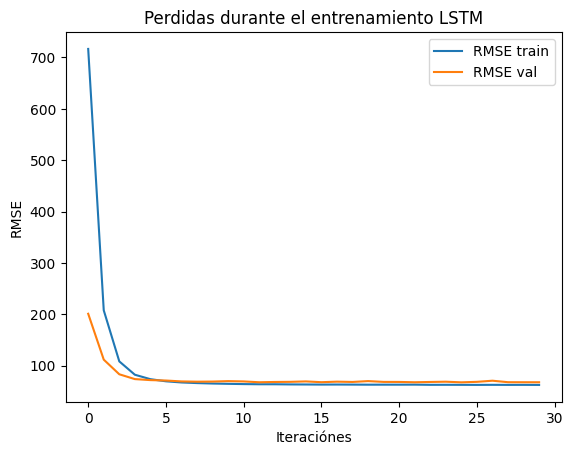

In [ ]:
# Graficamos las curvas de entrenamiento y validación
# Para verificar que no existe overfitting
plt.plot(historia.history['loss'], label='RMSE train')
plt.plot(historia.history['val_loss'], label='RMSE val')
plt.title('Perdidas durante el entrenamiento LSTM')
plt.xlabel('Iteraciónes')
plt.ylabel('RMSE')
plt.legend(),

In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

#Predicciones vs valores reales

Cuando evaluamos las gráficas de valores reales versus predicciones en los conjuntos de entrenamiento, validación y prueba, buscamos ver una alineación cercana entre los puntos reales y las predicciones generadas por el modelo. En términos visuales, esto se traduce en gráficas donde los puntos de predicción se superponen significativamente con los puntos reales en todas las fases del conjunto de datos. Un buen ajuste visual indica que el modelo está capturando adecuadamente los patrones y tendencias de los datos.

Además de la evaluación visual, utilizamos diversas métricas para cuantificar la calidad del modelo:

El RMSE (Root Mean Squared Error) es una métrica que calcula la raíz cuadrada del promedio de los errores al cuadrado entre las predicciones y los valores reales. Un valor bajo de RMSE indica que el modelo está generando predicciones cercanas a los valores reales.

El MSE (Mean Squared Error) es el promedio de los errores al cuadrado entre las predicciones y los valores reales. Al igual que el RMSE, un MSE bajo sugiere que el modelo está produciendo predicciones precisas.

El MAE (Mean Absolute Error) calcula el promedio de las diferencias absolutas entre las predicciones y los valores reales. Es menos sensible a los valores atípicos que el MSE.

Finalmente, el MAPE (Mean Absolute Percentage Error) calcula el promedio del porcentaje absoluto de diferencia entre las predicciones y los valores reales. Proporciona una medida de la precisión relativa de las predicciones y es útil para interpretar el error en el contexto de los valores reales.

Valores bajos en estas métricas indican que el modelo está realizando predicciones precisas y se ha optimizado adecuadamente para el problema en cuestión.

In [ ]:
train_prediction = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Prediction': train_prediction, 'Actuals':y_train})
train_results

191/191 [==============================] - 1s 3ms/step


,Train Prediction,Actuals
0,47.672764,50.0
1,44.204636,34.0
2,30.627237,33.0
3,30.928204,37.0
4,35.894512,40.0
...,...,...
6077,13.751184,9.0
6078,13.311635,10.0
6079,13.987725,9.0
6080,13.460625,10.0


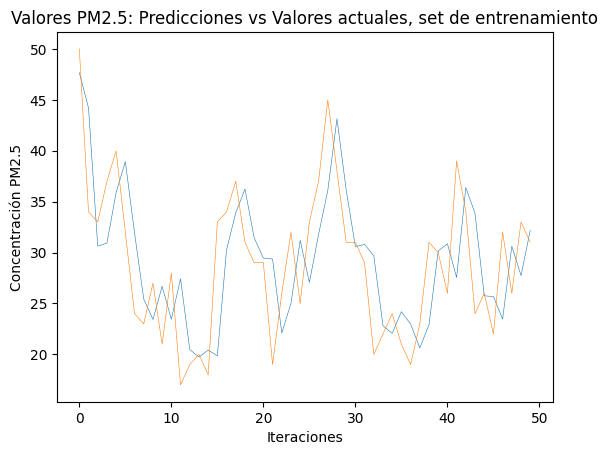

In [ ]:
plt.figure(figsize=(10, 5))  # Ajusta el tamaño del gráfico para una mejor visualización

# Graficar las predicciones de entrenamiento
plt.plot(train_results['Train Prediction'][:50], label='Predicción Entrenamiento', linewidth=2, color='red')
# Graficar los valores reales
plt.plot(train_results['Actuals'][:50], label='Valores Reales', linewidth=2, color='blue')

# Configuración de los títulos y etiquetas
plt.xlabel('Iteraciones')  # Etiqueta del eje X
plt.ylabel('Concentración PM2.5')  # Etiqueta del eje Y
plt.title('Valores PM2.5: Predicciones vs Valores Actuales, Set de Entrenamiento')  # Título del gráfico

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Calcular RMSE
rmse = np.sqrt(mean_squared_error(train_results['Actuals'], train_results['Train Prediction']))

# Calcular MSE
mse = mean_squared_error(train_results['Actuals'], train_results['Train Prediction'])

# Calcular MAE
mae = mean_absolute_error(train_results['Actuals'], train_results['Train Prediction'])

# Calcular MAPE
# Añadir un pequeño valor a los denominadores para evitar la división por cero
mape = np.mean(np.abs((train_results['Actuals'] - train_results['Train Prediction']) / (train_results['Actuals'] + 1e-8))) * 100

# Imprimir las métricas
print("RMSE:", rmse)
print("MSE:", mse)
print("MAE:", mae)
print("MAPE:", mape)

RMSE: 7.907587440905916
MSE: 62.52993913557297
MAE: 5.889552346732593
MAPE: 23.401422630018594


In [ ]:
val_predictions = model1.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val})
val_results

41/41 [==============================] - 0s 2ms/step


,Val Predictions,Actuals
0,15.528917,11.0
1,15.221670,17.0
2,18.873672,20.0
3,21.929111,20.0
4,22.290091,14.0
...,...,...
1299,19.490726,19.0
1300,20.579384,18.0
1301,19.832430,19.0
1302,20.127142,25.0


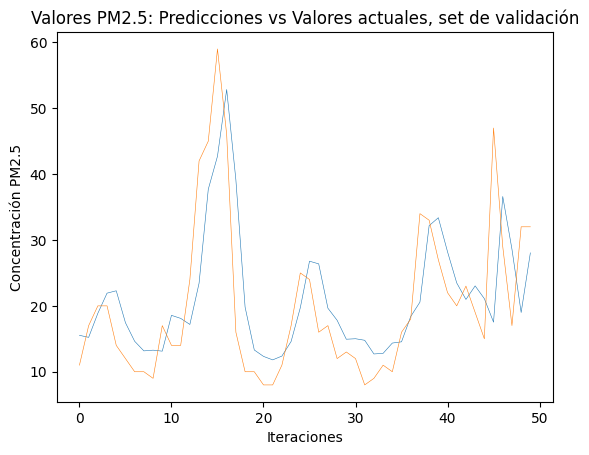

In [ ]:
plt.plot(val_results['Val Predictions'][:50], label='Val Prediction', linewidth=0.4)
plt.plot(val_results['Actuals'][:50], label='Actuals', linewidth=0.4)
plt.xlabel('Iteraciones') # Use plt.xlabel to set x-axis label
plt.ylabel('Concentración PM2.5') # Use plt.ylabel to set y-axis label
plt.title('Valores PM2.5: Predicciones vs Valores actuales, set de validación')  # Display legends based on the labels provided above
plt.show()

In [ ]:
# Calcular RMSE
rmse = np.sqrt(mean_squared_error(val_results['Actuals'], val_results['Val Predictions']))

# Calcular MSE
mse = mean_squared_error(val_results['Actuals'], val_results['Val Predictions'])

# Calcular MAE
mae = mean_absolute_error(val_results['Actuals'], val_results['Val Predictions'])

# Calcular MAPE
# Añadir un pequeño valor a los denominadores para evitar la división por cero
mape = np.mean(np.abs((val_results['Actuals'] - val_results['Val Predictions']) / (val_results['Actuals'] + 1e-8))) * 100

# Imprimir las métricas
print("RMSE:", rmse)
print("MSE:", mse)
print("MAE:", mae)
print("MAPE:", mape)

RMSE: 8.217216471673767
MSE: 67.52264654234668
MAE: 6.212327091519772
MAPE: 35.928991244916645


In [ ]:
test_predictions = model1.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':val_predictions, 'Actuals':y_val})
test_results

575/575 [==============================] - 1s 2ms/step


,Test Predictions,Actuals
0,15.528917,11.0
1,15.221670,17.0
2,18.873672,20.0
3,21.929111,20.0
4,22.290091,14.0
...,...,...
1299,19.490726,19.0
1300,20.579384,18.0
1301,19.832430,19.0
1302,20.127142,25.0


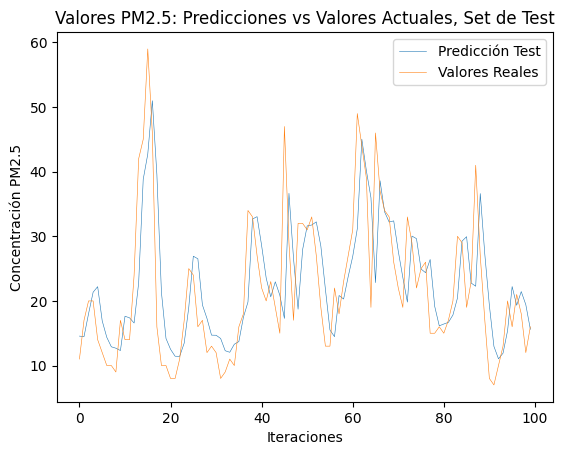

In [ ]:
# Graficar las predicciones del conjunto de test
plt.plot(test_results['Test Predictions'][:100], label='Predicción Test', linewidth=0.4)

# Graficar los valores reales del conjunto de test
plt.plot(test_results['Actuals'][:100], label='Valores Reales', linewidth=0.4)

# Configurar las etiquetas y el título del gráfico
plt.xlabel('Iteraciones')  # Etiqueta del eje X
plt.ylabel('Concentración PM2.5')  # Etiqueta del eje Y
plt.title('Valores PM2.5: Predicciones vs Valores Actuales, Set de Test')  # Título del gráfico

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

In [ ]:
# Assuming test_results is a DataFrame containing 'Test Predictions' and 'Actuals' columns
# Extraer datos para los cálculos
actuals = test_results['Actuals'][:100]
predictions = test_results['Test Predictions'][:100]

# Calcular RMSE (Raíz del Error Cuadrático Medio)
rmse = np.sqrt(mean_squared_error(actuals, predictions))

# Calcular MSE (Error Cuadrático Medio)
mse = mean_squared_error(actuals, predictions)

# Calcular MAE (Error Absoluto Medio)
mae = mean_absolute_error(actuals, predictions)

# Calcular MAPE (Error Porcentual Absoluto Medio)
# Añadir un pequeño valor a los denominadores para evitar la división por cero
mape = np.mean(np.abs((actuals - predictions) / (actuals + 1e-8))) * 100

# Imprimir las métricas
print("RMSE:", rmse)
print("MSE:", mse)
print("MAE:", mae)
print("MAPE:", mape)

RMSE: 8.093471506002302
MSE: 65.50428101847118
MAE: 5.845294628143311
MAPE: 30.601005779061335


#Definimos un nuevo dataset que contenga valores nunca vistos por el modelo

Se define dicho dataset para probar el modelo con datos nuevos que nunca ha visto en ninguno de los 3 set de train, val y test

In [ ]:
df2 = df1[['Fecha', 'PM2.5']].set_index('Fecha')
df2.head()

,PM2.5
Fecha,
2012-09-18 00:00:00,15.915789
2012-09-18 01:00:00,15.922298
2012-09-18 02:00:00,15.928807
2012-09-18 03:00:00,15.935316
2012-09-18 04:00:00,15.941825


# Predicciones para valores que nunca han sido vistos por el modelo

Cuando el modelo realiza predicciones para valores nunca antes vistos, es decir, datos del conjunto de prueba, es crucial observar cómo se comporta en este escenario. Si el modelo ha sido entrenado de manera efectiva y generaliza bien, esperamos que las predicciones sean precisas incluso para datos que no ha visto durante el entrenamiento.

La capacidad del modelo para generalizar se evalúa mediante la comparación de las predicciones con los valores reales en el conjunto de prueba. Si las predicciones se ajustan bien a los valores reales y el error (medido por métricas como RMSE, MSE, MAE, MAPE) es bajo, esto indica que el modelo ha aprendido patrones generales en los datos y es capaz de hacer predicciones confiables incluso para datos nuevos.

Además, para ganar confianza en la capacidad predictiva del modelo, es útil realizar varias pruebas y observar cómo se comporta en diferentes conjuntos de datos de prueba. Si el modelo muestra consistentemente un buen rendimiento en múltiples pruebas, esto fortalece la confianza en su capacidad para hacer predicciones precisas y confiables en situaciones del mundo real.

En resumen, cuando el modelo LSTM produce predicciones precisas y confiables para valores nunca antes vistos, esto proporciona una sólida evidencia de que el modelo ha sido bien entrenado y tiene la capacidad de generalizar efectivamente a datos nuevos, lo que aumenta la confianza en su utilidad para hacer pronósticos en la práctica.

1/1 [==============================] - 1s 870ms/step


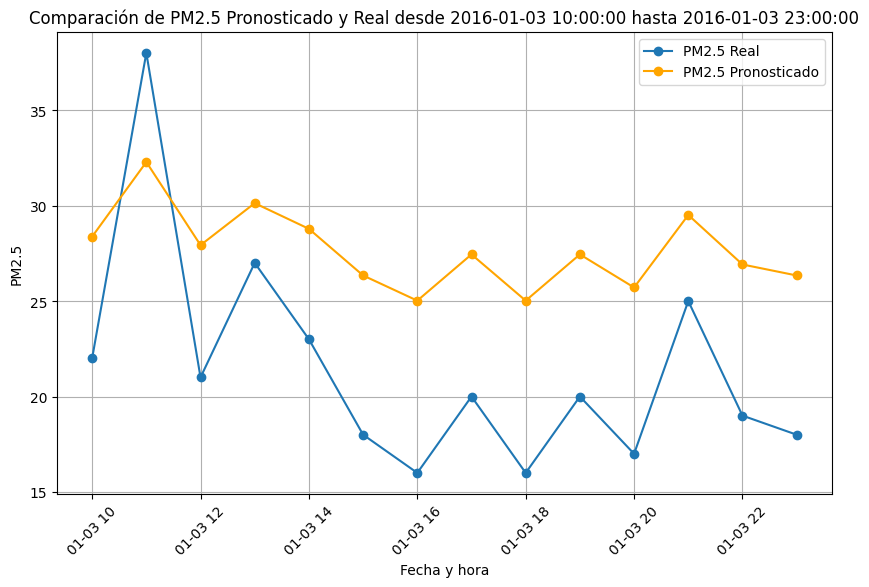

In [ ]:
# Asegurarse de que las fechas de inicio y fin existen en tu dataset
start_date_new = '2016-01-03 10:00:00'  # Fecha de inicio ajustada para nuevos datos
end_date_new = '2016-01-03 23:00:00'    # Fecha de fin ajustada para nuevos datos

# Convertir el índice de df2 a datetime si aún no lo está
df2.index = pd.to_datetime(df2.index)

# Utilizar loc para seleccionar filas dentro del rango de fechas para los nuevos datos
X_new_dates = df2.loc[(df2.index >= start_date_new) & (df2.index <= end_date_new)]

# Comprobar si los datos seleccionados no están vacíos
if X_new_dates.empty:
    print("Error: No se encontraron datos dentro del rango de fechas especificado.")
else:
    # Utilizar el modelo entrenado para hacer predicciones
    # (Suponiendo que 'model1' es tu modelo entrenado)
    predictions = model1.predict(X_new_dates)

    # Graficar tanto los valores reales de PM2.5 como los valores pronosticados
    plt.figure(figsize=(10, 6))
    plt.plot(X_new_dates.index, X_new_dates['PM2.5'], marker='o', linestyle='-', label='PM2.5 Real')
    plt.plot(X_new_dates.index, predictions, marker='o', linestyle='-', color='orange', label='PM2.5 Pronosticado')
    plt.title('Comparación de PM2.5 Pronosticado y Real desde {} hasta {}'.format(start_date_new, end_date_new))
    plt.xlabel('Fecha y hora')
    plt.ylabel('PM2.5')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
# Calcular MAPE
mape = np.mean(np.abs((X_new_dates['PM2.5'].values - predictions.flatten()) / X_new_dates['PM2.5'].values)) * 100

print("RMSE:", rmse)
print("MSE:", mse)
print("MAE:", mae)
print("MAPE:", mape)

RMSE: 8.093471506002302
MSE: 65.50428101847118
MAE: 5.845294628143311
MAPE: 36.04296850727792


Sincronización Wandb

In [ ]:
#Instalar Wandb y Autenticarse
!pip install wandb


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.6/289.6 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.9 MB/s eta 0:00:00


In [ ]:
import wandb
wandb.login()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
from wandb.integration.keras import WandbCallback

In [ ]:
#from wandb.keras import WandbCallback
#Integrar Wandb en el Entrenamiento del Modelo RNN
# Inicializar Wandb
wandb.init(project='calidad-del-aire-medellin', entity='manteneafit', name='lstm_pm25_model')

wandb: Currently logged in as: ingmanuelandradef (manteneafit). Use `wandb login --relogin` to force relogin


In [ ]:
# Guardar el mejor modelo y utilizar el callback de Wandb
cp = ModelCheckpoint('model1/best_model.h5', save_best_only=True, monitor='val_root_mean_squared_error', mode='min')
historia = model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, callbacks=[cp, WandbCallback()])

wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/30
184/191 [===========================>..] - ETA: 0s - loss: 62.7322 - root_mean_squared_error: 7.9204

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240614_023427-kshqpnjp/files/model-best)... Done. 0.0s


191/191 [==============================] - 9s 31ms/step - loss: 62.7114 - root_mean_squared_error: 7.9191 - val_loss: 67.5279 - val_root_mean_squared_error: 8.2175
Epoch 2/30
191/191 [==============================] - 2s 10ms/step - loss: 62.5651 - root_mean_squared_error: 7.9098 - val_loss: 68.8206 - val_root_mean_squared_error: 8.2958
Epoch 3/30
185/191 [============================>.] - ETA: 0s - loss: 62.6705 - root_mean_squared_error: 7.9165

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240614_023427-kshqpnjp/files/model-best)... Done. 0.0s


191/191 [==============================] - 5s 28ms/step - loss: 62.5912 - root_mean_squared_error: 7.9115 - val_loss: 67.2224 - val_root_mean_squared_error: 8.1989
Epoch 4/30
191/191 [==============================] - 1s 6ms/step - loss: 62.4338 - root_mean_squared_error: 7.9015 - val_loss: 68.8182 - val_root_mean_squared_error: 8.2957
Epoch 5/30
191/191 [==============================] - 1s 5ms/step - loss: 62.3650 - root_mean_squared_error: 7.8972 - val_loss: 69.1086 - val_root_mean_squared_error: 8.3132
Epoch 6/30
191/191 [==============================] - 1s 5ms/step - loss: 62.4406 - root_mean_squared_error: 7.9019 - val_loss: 68.1110 - val_root_mean_squared_error: 8.2529
Epoch 7/30
191/191 [==============================] - 1s 6ms/step - loss: 62.4715 - root_mean_squared_error: 7.9039 - val_loss: 68.2354 - val_root_mean_squared_error: 8.2605
Epoch 8/30
191/191 [==============================] - 1s 5ms/step - loss: 62.1591 - root_mean_squared_error: 7.8841 - val_loss: 68.8888 - va

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240614_023427-kshqpnjp/files/model-best)... Done. 0.0s


191/191 [==============================] - 8s 43ms/step - loss: 62.4310 - root_mean_squared_error: 7.9013 - val_loss: 67.0856 - val_root_mean_squared_error: 8.1906
Epoch 12/30
191/191 [==============================] - 1s 6ms/step - loss: 62.2019 - root_mean_squared_error: 7.8868 - val_loss: 68.0932 - val_root_mean_squared_error: 8.2519
Epoch 13/30
191/191 [==============================] - 1s 6ms/step - loss: 62.2907 - root_mean_squared_error: 7.8924 - val_loss: 68.9608 - val_root_mean_squared_error: 8.3043
Epoch 14/30
191/191 [==============================] - 1s 5ms/step - loss: 62.2231 - root_mean_squared_error: 7.8882 - val_loss: 68.6631 - val_root_mean_squared_error: 8.2863
Epoch 15/30
191/191 [==============================] - 1s 6ms/step - loss: 62.1700 - root_mean_squared_error: 7.8848 - val_loss: 68.4422 - val_root_mean_squared_error: 8.2730
Epoch 16/30
191/191 [==============================] - 1s 6ms/step - loss: 62.0944 - root_mean_squared_error: 7.8800 - val_loss: 69.1574

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240614_023427-kshqpnjp/files/model-best)... Done. 0.0s


191/191 [==============================] - 6s 30ms/step - loss: 61.9774 - root_mean_squared_error: 7.8726 - val_loss: 67.0116 - val_root_mean_squared_error: 8.1861
Epoch 24/30
191/191 [==============================] - 1s 6ms/step - loss: 62.1375 - root_mean_squared_error: 7.8827 - val_loss: 67.6236 - val_root_mean_squared_error: 8.2234
Epoch 25/30
191/191 [==============================] - 1s 5ms/step - loss: 61.9228 - root_mean_squared_error: 7.8691 - val_loss: 67.2230 - val_root_mean_squared_error: 8.1990
Epoch 26/30
191/191 [==============================] - 2s 10ms/step - loss: 61.9423 - root_mean_squared_error: 7.8703 - val_loss: 69.9971 - val_root_mean_squared_error: 8.3664
Epoch 27/30
191/191 [==============================] - 2s 13ms/step - loss: 61.7517 - root_mean_squared_error: 7.8582 - val_loss: 67.5284 - val_root_mean_squared_error: 8.2176
Epoch 28/30
191/191 [==============================] - 2s 10ms/step - loss: 61.8018 - root_mean_squared_error: 7.8614 - val_loss: 67.9

Preparar el Modelo para Hugging Face

In [ ]:
# Guardar el modelo Keras
model_path = "mejor_modelo_lstm.h5"
model1.save(model_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!pip install huggingface_hub

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
from huggingface_hub import Repository

# Configurar usuario y email de Git (ajústalo con tus datos)
!git config --global user.email "ingmanuelandradef@gmail.com"
!git config --global user.name "ManCD"

repo_url = "https://huggingface.co/ManCD/lstm-pm25-model"
local_dir = "lstm-pm25-model"

# Clonar el repositorio si no existe localmente
try:
    repo = Repository(local_dir=local_dir, clone_from=repo_url)
    print("Repositorio clonado exitosamente.")
except Exception as e:
    print(e)
    print("Repositorio ya clonado. Asegúrate de hacer pull de los últimos cambios con repo.git_pull().")

# Copiar el modelo al directorio del repositorio
!cp mejor_modelo_lstm.h5 {local_dir}/

# Cambiar al directorio del repositorio, realizar commit y push
import os
os.chdir(local_dir)
!git add .
!git commit -m "Add LSTM model"
!git push

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_deprecation.py:131: FutureWarning: 'Repository' (from 'huggingface_hub.repository') is deprecated and will be removed from version '1.0'. Please prefer the http-based alternatives instead. Given its large adoption in legacy code, the complete removal is only planned on next major release.
For more details, please read https://huggingface.co/docs/huggingface_hub/concepts/git_vs_http.
  warnings.warn(warning_message, FutureWarning)
Cloning https://huggingface.co/ManCD/lstm-pm25-model into local empty directory.


'email'
Repositorio ya clonado. Asegúrate de hacer pull de los últimos cambios con repo.git_pull().
[main c3ec9a2] Add LSTM model
 1 file changed, 3 insertions(+)
 create mode 100644 mejor_modelo_lstm.h5
batch response: Authorization error.
error: failed to push some refs to 'https://huggingface.co/ManCD/lstm-pm25-model'
